In [1]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Spécifier les répertoires pour les données d'entraînement et de test
train_dir = "C:\\Users\\Leo\\Documents\\Cours\\Cours Simplon\\Projet 15 - Alien vs Predator 2\\Data\\Train"
test_dir = "C:\\Users\\Leo\\Documents\\Cours\\Cours Simplon\\Projet 15 - Alien vs Predator 2\\Data\\Test"

# Créer des générateurs de données avec augmentation pour l'entraînement
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Mise à l'échelle des valeurs de pixel entre 0 et 1
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

# Charger les données d'entraînement et de test avec les générateurs
batch_size = 32
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),  # Redimensionner les images à la taille souhaitée
    batch_size=batch_size,
    class_mode='binary')  # Classification binaire

test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=batch_size,
    class_mode='binary')


Found 494 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))  # Couche de sortie binaire

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


In [3]:
epochs = 500
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=test_generator,
    validation_steps=test_generator.samples // batch_size)

Epoch 1/500
15/15 [==============================] - 10s 598ms/step - loss: 0.8820 - accuracy: 0.5368 - val_loss: 0.6628 - val_accuracy: 0.5990
Epoch 2/500
15/15 [==============================] - 9s 584ms/step - loss: 0.6435 - accuracy: 0.6017 - val_loss: 0.6666 - val_accuracy: 0.6198
Epoch 3/500
15/15 [==============================] - 10s 629ms/step - loss: 0.6134 - accuracy: 0.6580 - val_loss: 0.6711 - val_accuracy: 0.6510
Epoch 4/500
15/15 [==============================] - 9s 614ms/step - loss: 0.5939 - accuracy: 0.6905 - val_loss: 0.6583 - val_accuracy: 0.6771
Epoch 5/500
15/15 [==============================] - 9s 612ms/step - loss: 0.5801 - accuracy: 0.7078 - val_loss: 0.8279 - val_accuracy: 0.5885
Epoch 6/500
15/15 [==============================] - 9s 610ms/step - loss: 0.5495 - accuracy: 0.7165 - val_loss: 0.8938 - val_accuracy: 0.5885
Epoch 7/500
15/15 [==============================] - 9s 628ms/step - loss: 0.5506 - accuracy: 0.7273 - val_loss: 0.8756 - val_accuracy: 0.61

7/7 [==============================] - 1s 99ms/step - loss: 2.5596 - accuracy: 0.8150
Test Accuracy: 0.8149999976158142


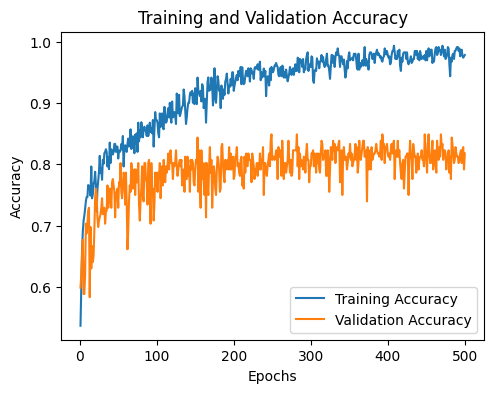

In [4]:
import matplotlib.pyplot as plt

# Évaluer le modèle sur les données de test
test_loss, test_accuracy = model.evaluate(test_generator)

# Afficher l'accuracy sur les données de test
print("Test Accuracy:", test_accuracy)

# Tracer la courbe d'apprentissage
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
epochs_range = range(1, epochs + 1)

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, train_accuracy, label='Training Accuracy')
plt.plot(epochs_range, val_accuracy, label='Validation Accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')

plt.show()
